<a href="https://colab.research.google.com/github/heerakesavan/CE888-Data-Science-and-Decision-making/blob/Master/Lab%203/Lab_3_bank_classification_Heera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Use LabelEncoder to convert the label into numbers**

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
labelencoder = LabelEncoder()

In [5]:
df['y'] = labelencoder.fit_transform(df['y'])

**Perform one-hot encoding on the categorical features**

In [6]:
data= pd.get_dummies(df)

**Column "duration" must be deleted**

In [7]:
data.drop('duration', axis=1, inplace=True)

In [8]:
data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [9]:
data.shape

(41188, 63)

**Check if there are any missing values in the dataset and drop them.**

In [10]:
data.isnull().sum()
data.dropna(inplace=True)

In [11]:
data.shape

(41188, 63)

**Plot histogram of the label.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of label')

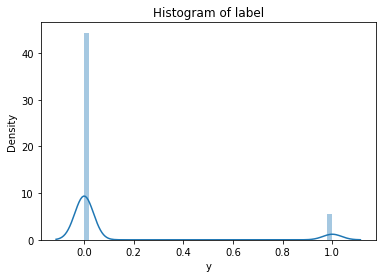

In [12]:
ax = sns.distplot(df["y"])
ax.set_title("Histogram of label")

**Calculate the imbalance in the dataset.**

In [13]:
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

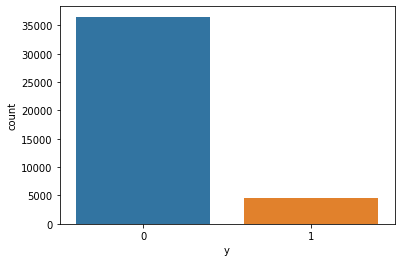

The data is highly imbalanced


In [14]:
sns.countplot(x='y',data=df)
plt.show()
print("The data is highly imbalanced")

**Split Dataset**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
X = data.drop('y', axis=1)
y = data['y']

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.2,stratify=y)

In [17]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

**10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
CV = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
random = RandomForestClassifier(n_estimators=100, max_depth=3)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7310
           1       0.73      0.13      0.23       928

    accuracy                           0.90      8238
   macro avg       0.82      0.56      0.59      8238
weighted avg       0.88      0.90      0.86      8238



In [19]:
cross_val_score(random, X_train, y_train, cv=CV)


array([0.89742033, 0.8952959 , 0.89742033, 0.89893778, 0.89742033,
       0.90015175, 0.89863429, 0.89559939, 0.89742033, 0.89863429])

**Compare the results of your classifier with that of a dummy classifier**

In [20]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified',random_state=50)
dummy.fit(X_train, y_train)
y_predd = dummy.predict(X_test)
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7310
           1       0.12      0.12      0.12       928

    accuracy                           0.80      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.80      0.80      8238



In [21]:
cross_val_score(dummy, X_train, y_train, cv=CV)


array([0.79453718, 0.7939302 , 0.79726859, 0.79059181, 0.78998483,
       0.78998483, 0.79059181, 0.79180577, 0.79423369, 0.79848255])

**The Accuracy of a Dummy Classifier = 0.80 and that of Random Classifier = 0.90**

**Use GridSearchCV to find a better set of parameters for your random forest.**

In [24]:
parameters = {"n_estimators":[10,50,100,200,500],
              'criterion':['gini','entropy'],
             'max_depth':[5,10,'None','sqrt'],
              'max_features': ['auto', 'sqrt', 'log2'],
             'bootstrap':['True','False']}

In [27]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
random = GridSearchCV(estimator=rf,param_grid=parameters,verbose=10,n_jobs=-1,scoring='accuracy')
random.fit(X_train,y_train)
random.best_params_,random.best_score_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

({'bootstrap': 'True',
  'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'auto',
  'n_estimators': 100},
 0.9012139605462822)

In [28]:
random.best_score_

0.9012139605462822

In [33]:
cross_val_score(estimator=random.best_estimator_,X= X_train,y= y_train, cv=CV, n_jobs=-1, scoring='accuracy', verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.9s finished


array([0.90197269, 0.89772382, 0.89742033, 0.90045524, 0.89742033,
       0.90318665, 0.90015175, 0.90379363, 0.89650986, 0.90409712])

**Columns**

In [30]:
len(data.columns)

63

**Question 6 Quiz**

In [37]:
rf6 = RandomForestClassifier(n_estimators=400, max_depth=6)
rf6.fit(X_train, y_train)
y_pred6 = rf6.predict(X_test)
print(classification_report(y_test,y_pred6))
crossvalrf6 = cross_val_score(rf6, X_train, y=y_train, cv=CV, n_jobs=-1, scoring='f1')
print(crossvalrf6)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.20      0.31       928

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238

[0.30897704 0.26579521 0.26754386 0.2832618  0.26086957 0.29184549
 0.25055928 0.30901288 0.26106195 0.31578947]


In [39]:
crossvalrf6.mean()

0.28147165437058136

**Question 7 Quiz**

In [38]:
rf7 = RandomForestClassifier(n_estimators=300, max_depth=6)
rf7.fit(X_train, y_train)
y_pred7 = rf7.predict(X_test)
print(classification_report(y_test,y_pred7))
crossvalrf7 = cross_val_score(rf7, X_train, y=y_train, cv=CV, n_jobs=-1, scoring='f1')
print(crossvalrf7)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.20      0.31       928

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238

[0.30543933 0.26579521 0.26754386 0.27956989 0.26143791 0.29247312
 0.25835189 0.30603448 0.25663717 0.32285115]


In [40]:
crossvalrf7.mean()

0.2816134013449968

**Question 8 Quiz**

In [43]:
rf8 = RandomForestClassifier(n_estimators = 100,max_depth=8, oob_score = True,random_state=60)
rf8.fit(X_train, y_train)
y_pred8 = rf8.predict(X_test)
print(classification_report(y_test,y_pred8))
crossvalrf8 = cross_val_score(rf8, X_train, y=y_train, cv=CV, n_jobs=-1, scoring='f1')
print(crossvalrf8)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238

[0.32510288 0.29535865 0.27896996 0.30443975 0.27848101 0.30607966
 0.25835189 0.32911392 0.29299363 0.34016393]


In [44]:
rf8.oob_score_

0.8993019726858877

In [46]:
crossvalrf8.mean()

0.300905529320356

**Question 9 Quiz**

In [50]:
from sklearn.feature_selection import SelectFromModel
feat_labels = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
rf9 = RandomForestClassifier(n_estimators=200,max_depth=12, random_state=60)
rf9.fit(X_train, y_train)
for feature in zip(feat_labels, rf9.feature_importances_):
    print(feature)

('age', 0.06169395574605889)
('campaign', 0.026379515205675982)
('pdays', 0.07205051949336223)
('previous', 0.027365622069919188)
('emp.var.rate', 0.061818337550654495)
('cons.price.idx', 0.04928711594210838)
('cons.conf.idx', 0.059788699615585604)
('euribor3m', 0.1349026402266929)
('nr.employed', 0.11300060904186901)
('y', 0.006854068329059783)
('job_admin.', 0.0067573515895396575)
('job_blue-collar', 0.0021583884430729033)
('job_entrepreneur', 0.002484486811680081)
('job_housemaid', 0.004056936220245183)
('job_management', 0.00635619469531774)
('job_retired', 0.003337149771881604)
('job_self-employed', 0.0041187486178334174)
('job_services', 0.005249592918163796)
('job_student', 0.006137715579250833)
('job_technician', 0.0033187607205954926)
('job_unemployed', 0.0022473037864538187)
('job_unknown', 0.004939143496794293)
('marital_divorced', 0.007339749379030913)
('marital_married', 0.007804192375414033)
('marital_single', 0.0007963287240427989)
('marital_unknown', 0.00490136367526585